Trilha 4: Tarefa (Peso 3)
Empregue no mínimo duas bases de dados (tabelas) extraídas de um ou ambos os sites abaixo: 

 

a. https://wid.world/ ; 

b. https://www.gapminder.org/  

 

E faça uma Exploração dos Dados EDA de seu interesse, empregando o Python e o que você aprendeu até aqui. Os sites apresentam diversos dados sobre as diferenças de desenvolvimento dos países e a desigualdade. Foque em perguntas que são do seu interesse sobre os dados. 

Na sua análise você deve responder ao menos quatro perguntas relevantes sobre os dados, incluir na sua análise seleções e visualizações dos dados e um texto de conclusão a cada pergunta. 

Peça ao professor modelos de código para sua implementação. 

Seu código deve ser minimamente claro e organizado. Não são necessários comentários detalhados, mas deixe claro no seu código cada parte (atividade), cada fase realizada e a resposta final com sua conclusão. 

 

Entrega:  

.pdf de print do seu notebook Python. 

Compartilhe o endereço do seu notebook Python (Google Drive ou GitHub) 100% executável para abertura no Google Colab.  

Não deixe de incluir o seu texto uma introdução justificando a escolha da análise e ao final suas conclusões. 


# Introdução
Para realização desta análise foram utilizados dados do site Gapminder. O dataframe escolhido possui dados sobre a Pobreza no Mundo (Rural e Urbana) e índice de Gini.


# Perguntas:
1. Em que período o índice de Gini melhorou no Brasil?

  Com a utilização do gráfico de barras foi verificada a variação do Gini entre 1980 e 2018, onde é possível observar uma piora entre 1980 e 1988, melhora entre 1988 e 1991, piora em 1992 e uma melhora entre 1993 e 2014. A melhora de 20 anos é interrompida e tem início de piora em 2015.


2. Como o Brasil se posiciona no índice de Gini em relação aos demais países do mundo?

  Comparando os dados de Gini do Brasil com os do Mundo, utilizei o gráfico boxplot para melhor visualização. Considerando quanto maior o índice, pior a desigualdade do país. É possível concluir que o Brasil está com índice muito ruim de Gini, estando muito distante da média mundial.


3. Em que período houve mais dados sobre a pobreza no Brasil?

  Utilizando um gráfico de linha com a densidade dos dados é possui observar que houve mais dados entre 1985 e 2015, com um crescimento ainda maior entre 2005 e 2010.


4. Como a pobreza urbana e rural do Brasil se modificaram com o tempo?

  Utiliza-se o gráfico boxplot para analizar a pobreza rural no Brasil. É possível observar que a média da pobreza rural no Brasil está menor que a média mundial de pobreza. Realizando essa análise com a pobreza urbana no Brasil verifica-se que a média brasileira é ligeiramente menor que a média mundial. 
  É possível observar o aumento da pobreza urbana no Brasil, ao mesmo tempo redução da pobreza no campo. Concluindo, utilizando um gráfico comparativo entre pobreza urbana x pobreza rural no Brasil por período é possivel obsevar aumento da pobreza urbana e redução da pobreza rural no Brasil.


# Conclusão

  Foi possível observar que o índice de Gini piorou em determinados momentos do país mas recuperou sua média, tendo uma pequena melhora entre 1980 e 2018. Houve aumento da pobreza urbana na mesma proporção em que houve melhora da probreza rural.  

In [214]:
# Importando Bibliotecas e adicionando seus respectivos alias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [215]:
#Importando os df: Gini, Rural, Urban
# Fonte: https://www.gapminder.org/data

dfGini = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/gini.csv')
dfRural = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/rural.csv')
dfUrbano = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/urban.csv')


# **Preparação dos dados**

In [216]:
# verificando o formato do df
dfGini.head()


,country,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,30.6,NaN,NaN,30.0,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,NaN
2,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.5,NaN,NaN,NaN,NaN,26.0,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,NaN,NaN,NaN,42.8,45.3,NaN,NaN,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,51.1,53.3,53.8,50.9,48.4,47.7,46.3,46.2,44.9,43.7,43.6,42.6,41.3,40.9,41.6,NaN,42.0,41.1,41.3,42.9
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,NaN,35.4,34.8,33.0,37.5,36.0,29.7,31.2,29.2,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4,29.9


In [217]:
mundo = pd.melt(dfGini, id_vars=['country'])
mundo = mundo.rename(columns={'variable':'year','value':'giniM'})

mundo.head()

,country,year,giniM
0,Angola,1966,NaN
1,Albania,1966,NaN
2,United Arab Emirates,1966,NaN
3,Argentina,1966,NaN
4,Armenia,1966,NaN


In [218]:
#mundo.drop('country', axis=1, inplace=True)
#mundo.head()

In [219]:
mundo.year = mundo.year.astype(str)

In [220]:
#mundo.year = pd.to_datetime(mundo.year, format='%Y',errors='coerce')

In [221]:
#mundo['year'] = mundo['year'].apply(lambda x : x.year())
mundo = mundo.groupby('year').agg({'giniM':np.median}).reset_index()


In [222]:
mundo.head()

,year,giniM
0,1966,34.0
1,1968,33.7
2,1969,NaN
3,1970,37.3
4,1971,NaN


In [223]:
dfGini_BR = dfGini[ dfGini.country == 'Brazil' ]
dfRural_BR = dfRural[ dfRural.country == 'Brazil' ]
dfUrbano_BR = dfUrbano[ dfUrbano.country == 'Brazil' ]


In [224]:
dfGini_BR.head()

,country,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
18,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.9,58.4,59.0,58.4,55.6,58.5,59.7,61.4,63.3,60.5,NaN,53.2,60.1,NaN,59.6,59.9,59.8,59.6,59.0,NaN,58.4,58.1,57.6,56.5,56.3,55.6,54.9,54.0,53.7,NaN,52.9,53.5,52.8,52.1,51.9,53.3,53.3,53.9,53.4


In [225]:
dfRural_BR.head()

,country,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
9,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.4,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN


In [226]:
dfUrbano_BR.head()

,country,1984,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
10,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,NaN,17.5,NaN,NaN,NaN


In [227]:
BR = pd.melt(dfGini_BR, id_vars=['country'])
BR.head()

,country,variable,value
0,Brazil,1966,NaN
1,Brazil,1968,NaN
2,Brazil,1969,NaN
3,Brazil,1970,NaN
4,Brazil,1971,NaN


In [228]:
BR2 = pd.melt(dfRural_BR, id_vars=['country'])
BR2.head()

,country,variable,value
0,Brazil,1984,NaN
1,Brazil,1987,NaN
2,Brazil,1988,NaN
3,Brazil,1989,NaN
4,Brazil,1990,NaN


In [229]:
BR3 = pd.melt(dfUrbano_BR, id_vars=['country'])
BR3.head()

,country,variable,value
0,Brazil,1984,NaN
1,Brazil,1987,NaN
2,Brazil,1988,NaN
3,Brazil,1989,NaN
4,Brazil,1990,NaN


In [230]:
BR = BR.rename(columns={'variable':'year','value':'gini'})
BR.head()

,country,year,gini
0,Brazil,1966,NaN
1,Brazil,1968,NaN
2,Brazil,1969,NaN
3,Brazil,1970,NaN
4,Brazil,1971,NaN


In [231]:
BR2 = BR2.rename(columns={'variable':'year','value':'rural'})
BR2.head()

,country,year,rural
0,Brazil,1984,NaN
1,Brazil,1987,NaN
2,Brazil,1988,NaN
3,Brazil,1989,NaN
4,Brazil,1990,NaN


In [232]:
BR3 = BR3.rename(columns={'variable':'year','value':'urbano'})
BR3.head()

,country,year,urbano
0,Brazil,1984,NaN
1,Brazil,1987,NaN
2,Brazil,1988,NaN
3,Brazil,1989,NaN
4,Brazil,1990,NaN


In [233]:
BR_merge = pd.merge(BR,BR2, on=['country','year'])
BR_merge.head()

,country,year,gini,rural
0,Brazil,1984,55.6,NaN
1,Brazil,1987,61.4,NaN
2,Brazil,1988,63.3,NaN
3,Brazil,1989,60.5,NaN
4,Brazil,1990,NaN,NaN


In [234]:
BR_merge = pd.merge(BR_merge,BR3, on=['country','year'])
BR_merge.head()

,country,year,gini,rural,urbano
0,Brazil,1984,55.6,NaN,NaN
1,Brazil,1987,61.4,NaN,NaN
2,Brazil,1988,63.3,NaN,NaN
3,Brazil,1989,60.5,NaN,NaN
4,Brazil,1990,NaN,NaN,NaN


In [235]:
# Normalizando dados

for c in BR_merge[['gini','rural','urbano']]:
  BR_merge[c] = BR_merge[c] / BR_merge[c].max()
BR_merge.head()

,country,year,gini,rural,urbano
0,Brazil,1984,0.878357,NaN,NaN
1,Brazil,1987,0.969984,NaN,NaN
2,Brazil,1988,1.000000,NaN,NaN
3,Brazil,1989,0.955766,NaN,NaN
4,Brazil,1990,NaN,NaN,NaN


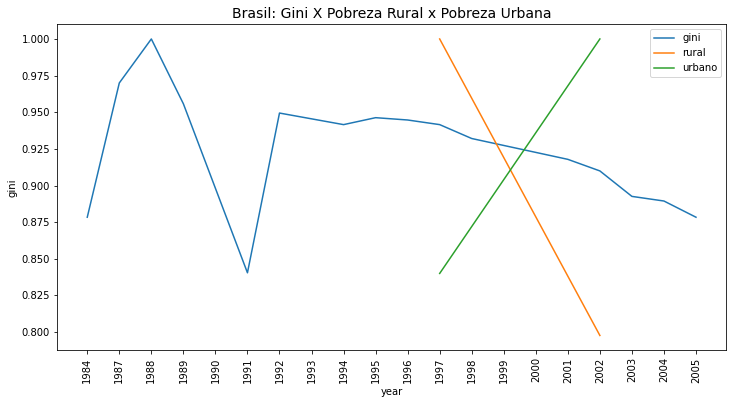

In [236]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR_merge.year, y=BR_merge.gini, label='gini')
sns.lineplot(x=BR_merge.year, y=BR_merge.rural, label='rural')
sns.lineplot(x=BR_merge.year, y=BR_merge.urbano, label='urbano')

plt.title('Brasil: Gini X Pobreza Rural x Pobreza Urbana', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

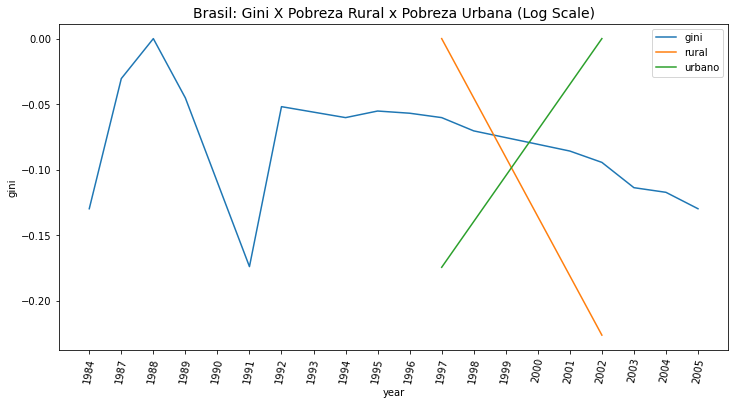

In [237]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR_merge.year, y=np.log( BR_merge.gini ), label='gini')
sns.lineplot(x=BR_merge.year, y=np.log( BR_merge.rural ), label='rural')
sns.lineplot(x=BR_merge.year, y=np.log( BR_merge.urbano ), label='urbano')

plt.title('Brasil: Gini X Pobreza Rural x Pobreza Urbana (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=80)
plt.show()

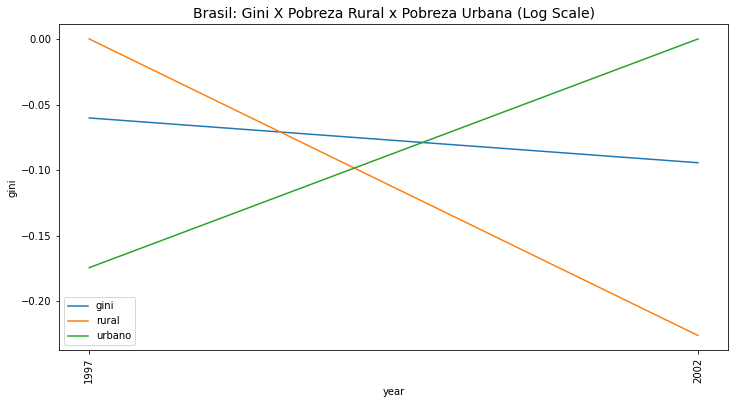

In [238]:
BR_not_null = BR_merge[ ~ np.isnan( BR_merge.gini )]
BR_not_null = BR_merge[ ~ np.isnan( BR_merge.rural )]
BR_not_null = BR_merge[ ~ np.isnan( BR_merge.urbano )]

plt.figure(figsize=(12,6))

sns.lineplot(x=BR_not_null.year, y=np.log( BR_not_null.gini ), label='gini')
sns.lineplot(x=BR_not_null.year, y=np.log( BR_not_null.rural ), label='rural')
sns.lineplot(x=BR_not_null.year, y=np.log( BR_not_null.urbano ), label='urbano')

plt.title('Brasil: Gini X Pobreza Rural x Pobreza Urbana (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [239]:
Gini_merge = pd.merge(BR,mundo, on=['year'])
Gini_merge.head()

,country,year,gini,giniM
0,Brazil,1966,NaN,34.0
1,Brazil,1968,NaN,33.7
2,Brazil,1969,NaN,NaN
3,Brazil,1970,NaN,37.3
4,Brazil,1971,NaN,NaN


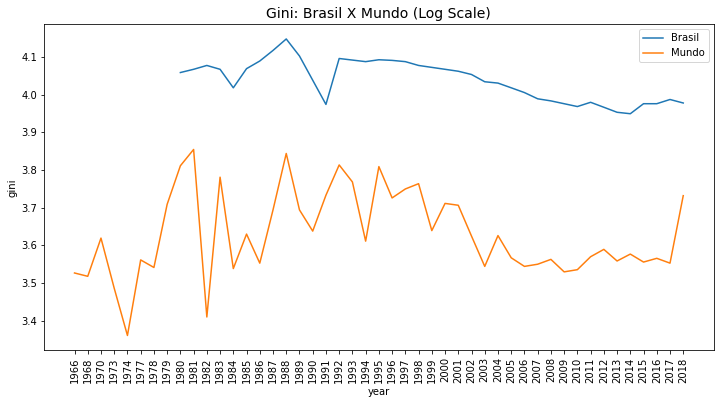

In [240]:
# comparando dados Gini Brasil x Mundo

Gini_not_null = Gini_merge[ ~ np.isnan( Gini_merge.gini )]
Gini_not_null = Gini_merge[ ~ np.isnan( Gini_merge.giniM )]

plt.figure(figsize=(12,6))

sns.lineplot(x=Gini_not_null.year, y=np.log( Gini_not_null.gini ), label='Brasil')
sns.lineplot(x=Gini_not_null.year, y=np.log( Gini_not_null.giniM ), label='Mundo')

plt.title('Gini: Brasil X Mundo (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()



In [242]:
# tratando valores vazios

#dfGini2 = dfGini_not_null.sort_values(['country', 'ano'])

In [243]:
# resetando o index

# dfGini = dfGini.reset_index()
# dfGini.head()

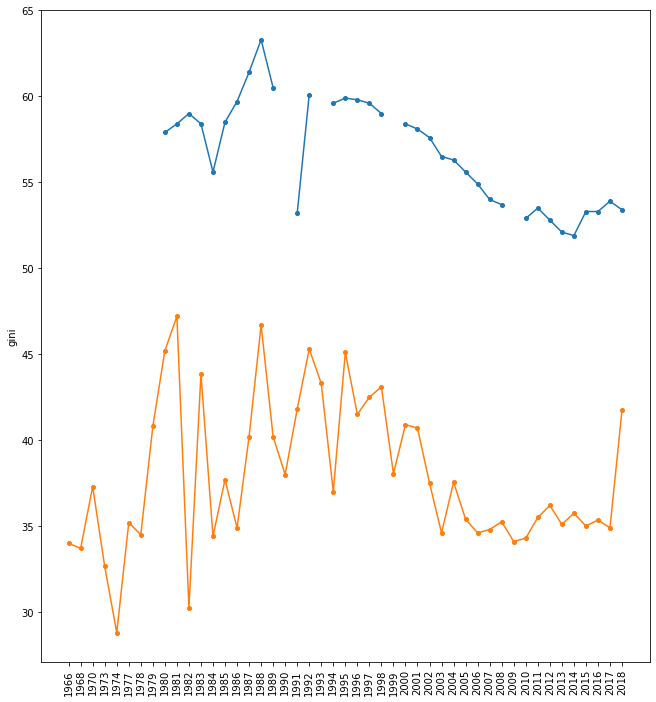

In [244]:
# Este não funcionou:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
plt.plot(Gini_not_null["year"],Gini_not_null["gini"],label="Brasil",marker="o", markersize=4)
plt.plot(Gini_not_null["year"],Gini_not_null["giniM"],label="Mundo",marker="o", markersize=4)
plt.ylabel("gini")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


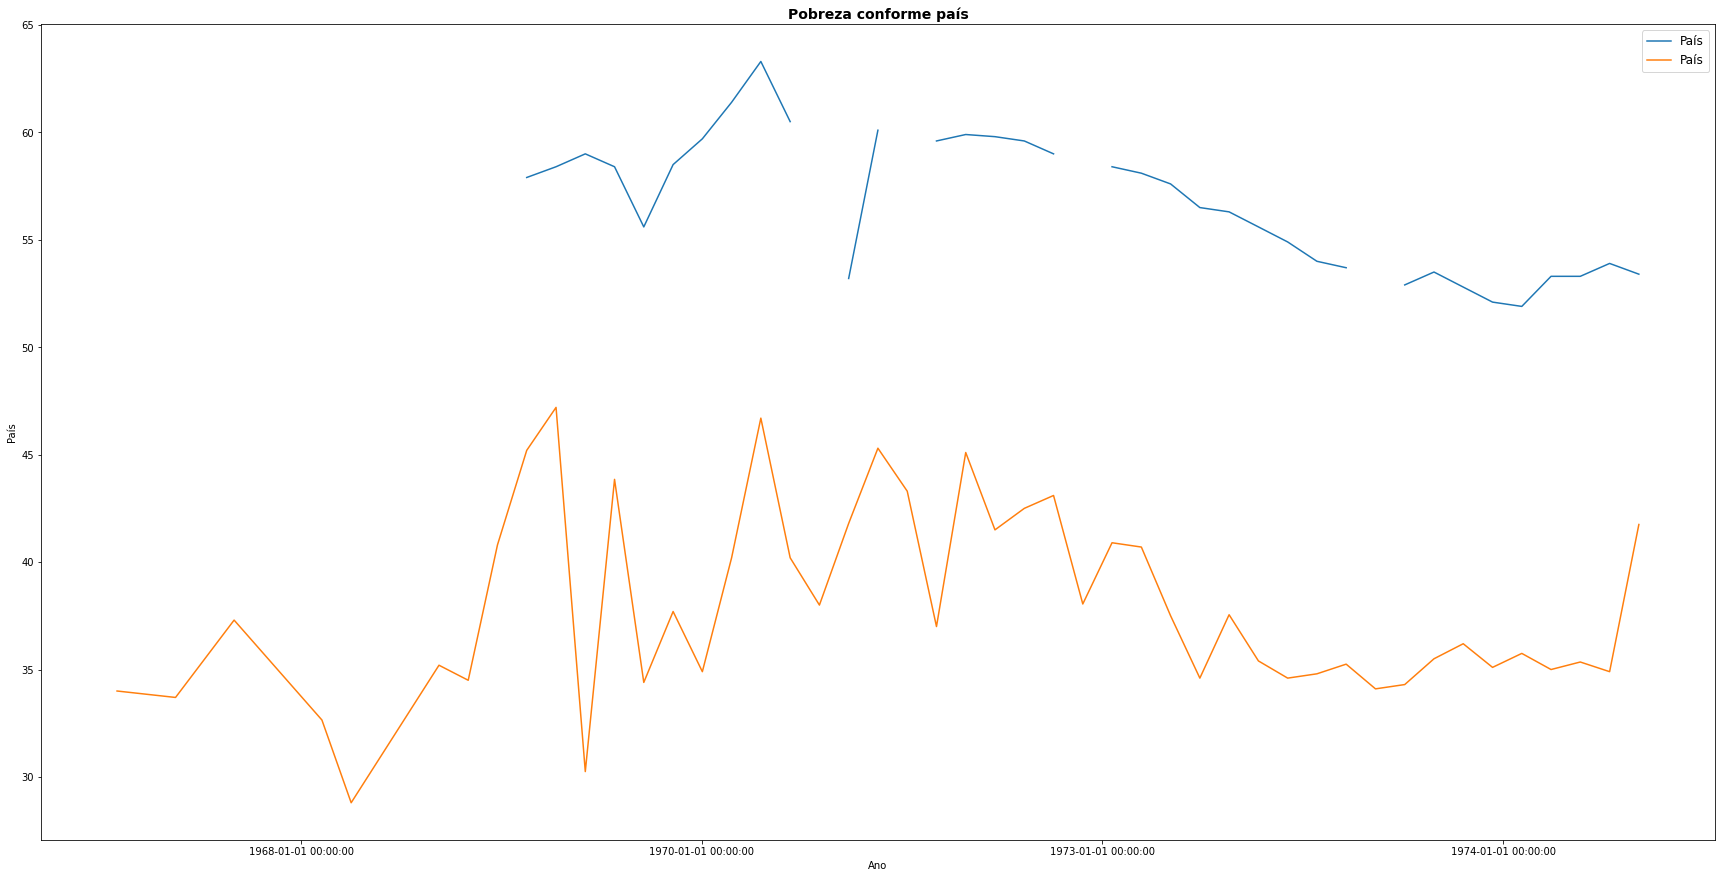

In [245]:
Gini_not_null.year = pd.to_datetime(Gini_not_null.year, format='%Y',errors='coerce')

fig, ax = plt.subplots(figsize=(30,15))
ax.plot(Gini_not_null.year,  Gini_not_null.gini, label='País')
ax.plot(Gini_not_null.year,  Gini_not_null.giniM, label='País')

ax.set_title('Pobreza conforme país', fontsize=14, weight='bold')
ax.set_xlabel("Ano")
ax.set_ylabel("País")

ax.legend(fontsize=12)
import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(Gini_not_null.year)
plt.show()

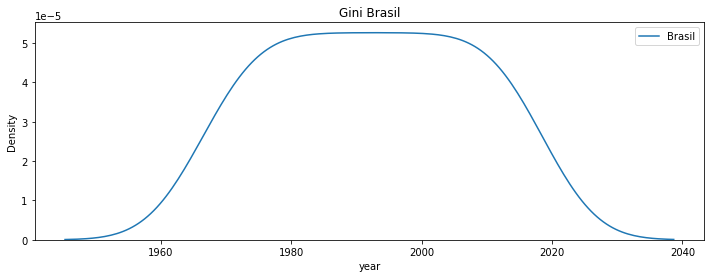

In [246]:
# Mostra a densidade dos dados conforme o período:
BR.year = pd.to_datetime(BR.year, format='%Y',errors='coerce')

plt.figure(figsize=(12,4))
sns.kdeplot(BR[BR.country == 'Brazil'].year,label='Brasil')
# sns.kdeplot(dfGini_not_null.ano,label='Mundo')
plt.title('Gini Brasil')
plt.legend()
plt.show()

# Os dados se concentram entre 1980 e 2010.


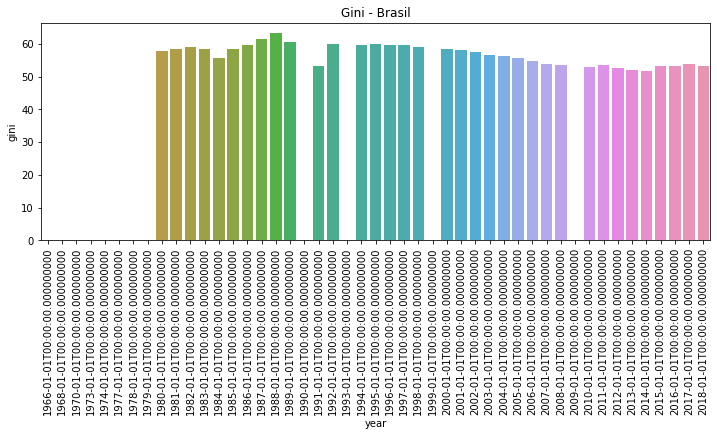

In [247]:
# Verificando a variação do Gini entre 1980 e 2018:
# Gini, quanto menor, melhor:
# É possível observar uma piora entre 1980 e 1988, melhora entre 1988 e 1991, piora em 1992 e uma melhora entre 1993 e 2014.
# A melhora de 20 anos é interrompida e tem início de piora em 2015.

plt.figure(figsize=(12,4))
sns.barplot(x=Gini_not_null.year, y=Gini_not_null.gini)
plt.title('Gini - Brasil')
plt.xticks(rotation=90)
plt.show()

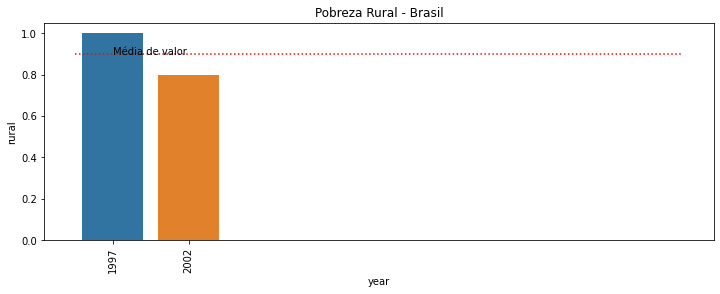

In [249]:
# Gerando gráfico de barras Pobreza Rural no Brasil. 
# É possível observar queda na pobreza rural entre 1997 e 2002. Há poucos dados para maiores observações. 

plt.figure(figsize=(12,4))
sns.barplot(x=BR_not_null.year, y=BR_not_null.rural)
plt.title('Pobreza Rural - Brasil')
plt.hlines(BR_not_null.rural.mean(),-0.5,7.5,color='r', linestyles=':')
plt.text(0, BR_not_null.rural.mean(),'Média de valor')
plt.xticks(rotation=90)
plt.show()

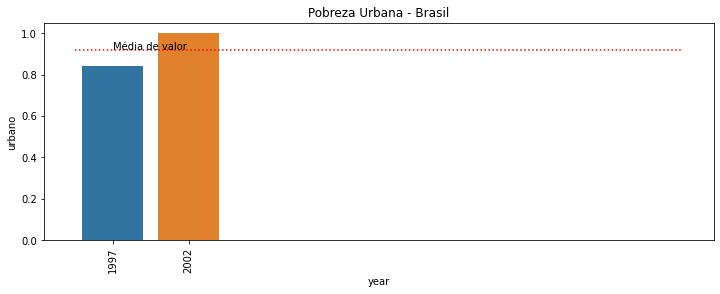

In [250]:
# Gerando gráfico de barras Pobreza no Brasil. 
# É possível observar aumento na pobreza urbana entre 1997 e 2002.

plt.figure(figsize=(12,4))
sns.barplot(x=BR_not_null.year, y=BR_not_null.urbano)
plt.title('Pobreza Urbana - Brasil')
plt.hlines(BR_not_null.urbano.mean(),-0.5,7.5,color='r', linestyles=':')
plt.text(0, BR_not_null.urbano.mean(),'Média de valor')
plt.xticks(rotation=90)
plt.show()

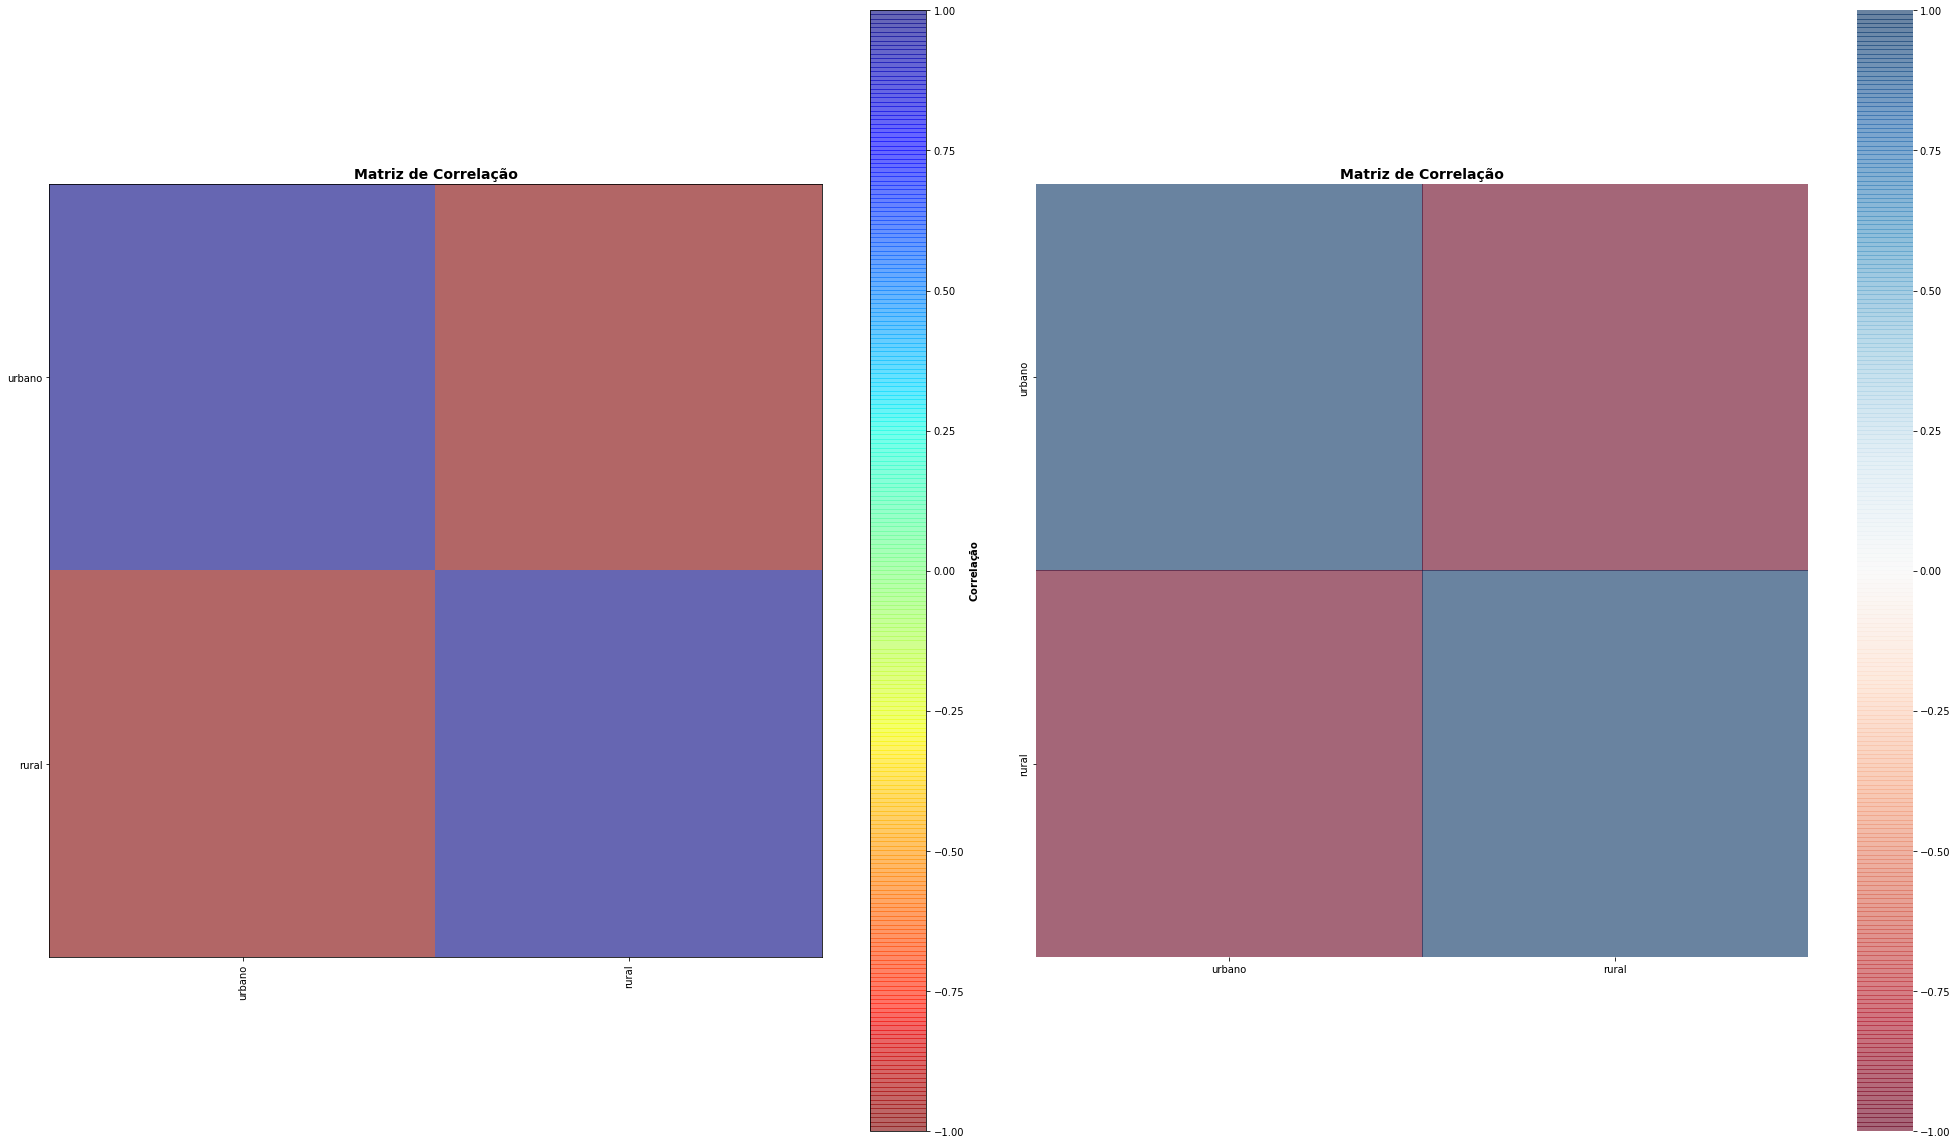

In [251]:
plt.figure(figsize=(28,16))


matriz = BR_not_null[[	'urbano',		'rural' ]].corr()

plt.subplot(1,2,1)
plt.imshow(matriz, cmap='jet_r', alpha=0.6)

plt.xticks(np.arange(len( matriz.columns)), matriz.columns.to_list(), rotation=90)
plt.yticks(np.arange(len( matriz.columns)), matriz.columns.to_list())

cbar = plt.colorbar()
cbar.set_label('$\\bf{Correlação}$')

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.subplot(1,2,2)
sns.heatmap(matriz, cmap='RdBu', square=True, alpha=0.6) 

plt.title('Matriz de Correlação', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

In [252]:
RuralMundo = pd.melt(dfRural, id_vars=['country'])
RuralMundo = RuralMundo.rename(columns={'variable':'year','value':'ruralM'})
RuralMundo = RuralMundo.groupby('year').agg({'ruralM':np.median}).reset_index()
RuralMundo_not_null = RuralMundo[ ~ np.isnan( RuralMundo.ruralM )]
RuralMundo_not_null.head()

,year,ruralM
0,1984,49.5
1,1987,16.6
2,1988,71.9
3,1989,28.5
4,1990,28.9


In [253]:
# BR_merge.year = BR_merge.year.astype(str)
# RuralMundo_not_null.year = RuralMundo_not_null.year.astype(str)
Mundo_merge = pd.merge(BR_not_null, RuralMundo_not_null, on=['year'])
Mundo_merge.head()

,country,year,gini,rural,urbano,ruralM
0,Brazil,1997,0.941548,1.000000,0.84,61.05
1,Brazil,2002,0.909953,0.797665,1.00,52.40


In [254]:
UrbanoMundo = pd.melt(dfUrbano, id_vars=['country'])
UrbanoMundo = UrbanoMundo.rename(columns={'variable':'year','value':'urbanoM'})
UrbanoMundo = UrbanoMundo.groupby('year').agg({'urbanoM':np.median}).reset_index()
UrbanoMundo_not_null = UrbanoMundo[ ~ np.isnan( UrbanoMundo.urbanoM )]
UrbanoMundo_not_null.head()

,year,urbanoM
0,1984,31.7
1,1987,7.3
2,1988,33.7
3,1989,19.7
4,1990,11.3


In [255]:
# BR_merge.year = BR_merge.year.astype(str)
# RuralMundo_not_null.year = RuralMundo_not_null.year.astype(str)
Mundo_merge = pd.merge(Mundo_merge, UrbanoMundo_not_null, on=['year'])
Mundo_merge.head()

,country,year,gini,rural,urbano,ruralM,urbanoM
0,Brazil,1997,0.941548,1.000000,0.84,61.05,30.05
1,Brazil,2002,0.909953,0.797665,1.00,52.40,35.70


In [256]:
# Normalizando dados

for c in Mundo_merge[['gini','rural','urbano','ruralM','urbanoM']]:
  Mundo_merge[c] = Mundo_merge[c] / Mundo_merge[c].max()
Mundo_merge.head()

,country,year,gini,rural,urbano,ruralM,urbanoM
0,Brazil,1997,1.000000,1.000000,0.84,1.000000,0.841737
1,Brazil,2002,0.966443,0.797665,1.00,0.858313,1.000000


([<matplotlib.axis.XTick at 0x7f9da73fa2d0>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

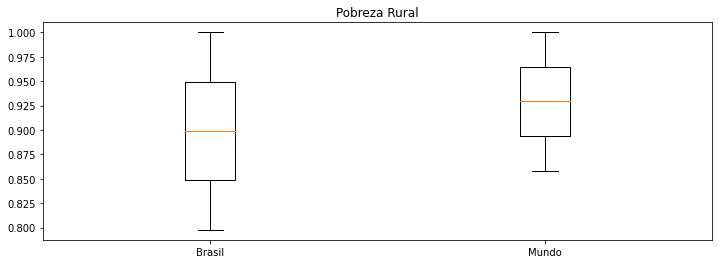

In [257]:
# Gerando gráfico de Pobreza Rural

plt.figure(figsize=(12,4))
plt.boxplot(Mundo_merge.rural,positions=[1],showfliers=False)
plt.boxplot(Mundo_merge.ruralM,positions=[2],showfliers=False)
plt.title('Pobreza Rural')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

In [258]:
# Como o gráfico boxplot é possível observar que a média da pobreza rural no Brasil está abaixo
# da média mundial.

Text(0.5, 1.0, 'Pobreza Rural - Brasil')

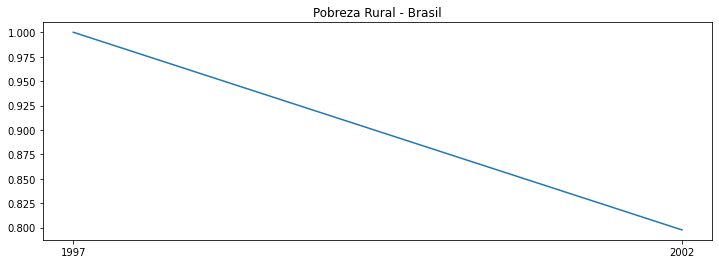

In [259]:
plt.figure(figsize=(12,4))
plt.plot(Mundo_merge.year, Mundo_merge.rural)
plt.title('Pobreza Rural - Brasil')

# Gráfico mostra uma situação de queda na pobreza rural

Text(0.5, 1.0, 'Pobreza Rural - Brasil')

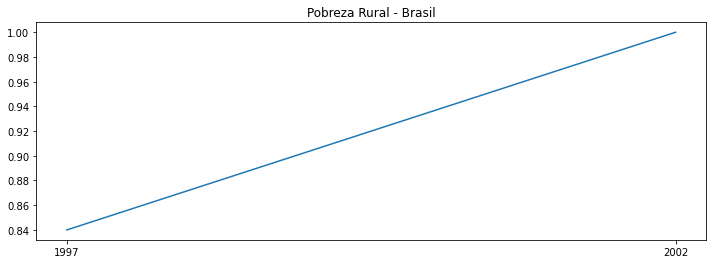

In [260]:
# Gráfico de barras Pobreza Rural no Brasil

plt.figure(figsize=(12,4))
plt.plot(Mundo_merge.year, Mundo_merge.urbano)
plt.title('Pobreza Rural - Brasil')

# É possível observar o aumento da pobreza urbana no Brasil entre 1997 e 2002.

([<matplotlib.axis.XTick at 0x7f9da76307d0>,
 [Text(0, 0, 'Brasil'), Text(0, 0, 'Mundo')])

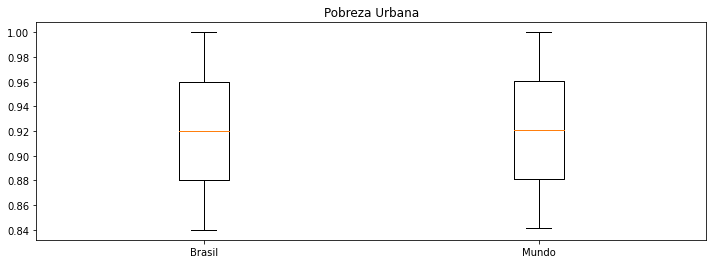

In [261]:
# Gráfico boxplot Pobreza Urbana Brasil e no Mundo
# Podemos observar que a pobreza urbana no Brasil é pouco menor que a média mundial.

plt.figure(figsize=(12,4))
plt.boxplot(Mundo_merge.urbano,positions=[1],showfliers=False)
plt.boxplot(Mundo_merge.urbanoM,positions=[2],showfliers=False)
plt.title('Pobreza Urbana')
plt.xticks(ticks=[1,2], labels=['Brasil','Mundo'])

### **Realizando a comparação**

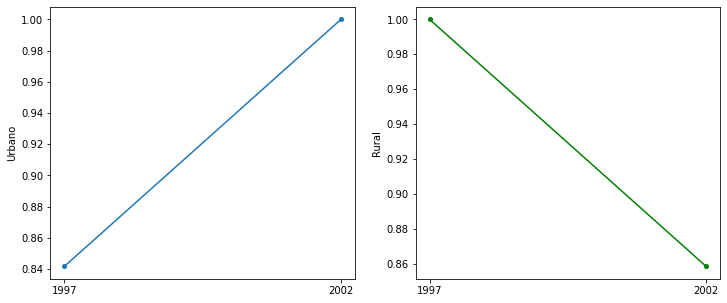

In [262]:
# Grafico de linha comparativo entre Pobreza Rural e Urbana no mundo
# O movimento é semelhante no Brasil, com aumento da probreza urbana e diminuição da rural.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Mundo_merge["year"],Mundo_merge["urbanoM"],label="Ano",marker="o", markersize=4)
plt.ylabel("Urbano")

plt.subplot(1,2,2)
plt.plot(Mundo_merge["year"],Mundo_merge["ruralM"],label="Ano",color="green",marker="o", markersize=4)
plt.ylabel("Rural")

plt.show()

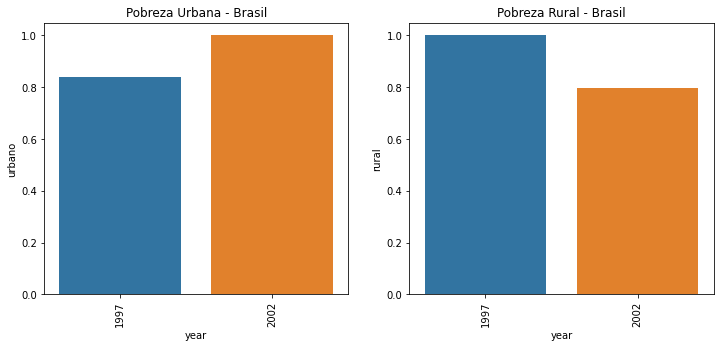

In [263]:
# Gráfico comparativo entre pobreza urbana x pobreza rural no Brasil
# É possivel obsevar aumento da pobreza urbana e redução da pobreza rural no Brasil. Pelo campo valor é possivel observar que a pobreza rural é muito maior.

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=Mundo_merge.year, y=Mundo_merge.urbano)
plt.title('Pobreza Urbana - Brasil')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(x=Mundo_merge.year, y=Mundo_merge.rural)
plt.title('Pobreza Rural - Brasil')
plt.xticks(rotation=90)

plt.show()